# Lab 6
Molina Diaz, Sebastian Leonardo: smolinad@unal.edu.co

In [ ]:
import sympy 
sympy.init_session()

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [ ]:
from IPython.display import display, Latex, Markdown
%matplotlib inline

In [ ]:
x, y, z, u = sympy.symbols('x, y, z, u')

## Classic Sympy Solution

## 1.

Plot the following functions in a range that include the vertex and the roots (if there are roots).

In [ ]:
def plot_functs(a):
    #Solving for complex roots too
    sol = solve(a)
    p = plot(a, xlim = (-10, 10), ylim = (-10, 10))
    display(Markdown('#### Roots: '), sol)
    p;

- $x^2$

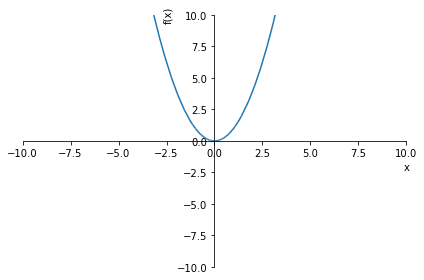

#### Roots: 

In [ ]:
plot_functs(x**2)

- $(x-1)^2$

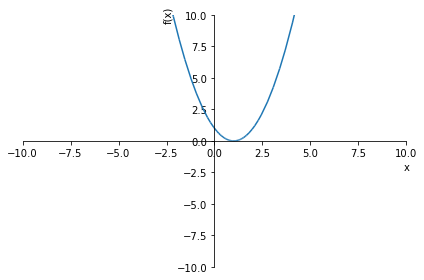

#### Roots: 

In [ ]:
plot_functs((x - 1)**2)

- $x^2-1$

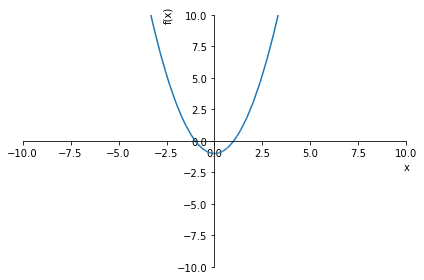

#### Roots: 

In [ ]:
plot_functs(x**2 - 1)

- $x^2+1$

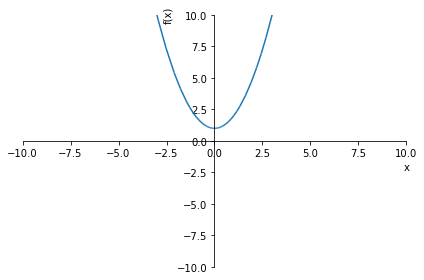

#### Roots: 

In [ ]:
plot_functs(x**2 + 1)

## Po Shen Loh Method

In [ ]:
from collections import OrderedDict

## 2.
Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations.

In [ ]:
def psl_fact(p):
    
    p = Poly(p, x)
    
    # To check if the input is a quadratic polynomial
    if degree(p) == 2:
    
        # Getting the monic form of the polynomial
        simplified = monic(p)
        display(Markdown('#### Monic form: '), simplified.as_expr())
        
        # Getting the coefficients of the monic polynomial
        coeff = simplified.all_coeffs()
        
        """
        Applying the Po Shen Loh Algorithm. Note that (b/2 + u)(b/2 - u) = c reduces to (b/2)**2 - u**2 = c,
        where a is the coefficient of the middle/second term and c is the coefficient of the third term
        """
        
        avg = solve(abs((coeff[1])/2) ** 2 - u**2 - simplified.all_coeffs()[2], u)
        display(Markdown('#### Values for $u$: '), avg)
        
        # Values for u
        f_p = -abs((coeff[1])/2) - avg[0]
        s_p = -abs((coeff[1])/2) + avg[0]
        
        if y in simplified.gens:
            factorized = (x + f_p * y) * (x + s_p * y)
            display(Markdown('#### Factorized polynomial: '), factorized)

            # Roots of the polynomial given by the Po Shen Loh Algorithm
            sol = [abs((coeff[1])/2) - avg[0] * y, abs((coeff[1])/2) + avg[0] * y]
            display(Markdown('#### Roots of the polynomial: '), sol)       
        else:
            #Factorized polynomial
            factorized = (x + f_p) * (x + s_p)
            display(Markdown('#### Factorized polynomial: '), factorized)

            # Roots of the polynomial given by the Po Shen Loh Algorithm
            sol = [abs((coeff[1])/2) - avg[0], abs((coeff[1])/2) + avg[0]]
            reduced = list(OrderedDict.fromkeys(sol))
            display(Markdown('#### Roots of the polynomial: '), reduced)
    
    else: 
        
        print("That's not a quadratic equation")

- $x^2$

In [ ]:
sol = psl_fact(x**2)
sol

#### Monic form: 

#### Values for $u$: 

#### Factorized polynomial: 

#### Roots of the polynomial: 

- $(x-1)^2$

In [ ]:
sol = psl_fact((x - 1)**2)
sol

#### Monic form: 

#### Values for $u$: 

#### Factorized polynomial: 

#### Roots of the polynomial: 

- $x^2-1$

In [ ]:
sol = psl_fact(x**2 - 1)
sol

#### Monic form: 

#### Values for $u$: 

#### Factorized polynomial: 

#### Roots of the polynomial: 

- $x^2+1$

In [ ]:
sol = psl_fact(x**2 + 1)
sol

#### Monic form: 

#### Values for $u$: 

#### Factorized polynomial: 

#### Roots of the polynomial: 

## 3.

Plot the Newton fractals for the corresponding complex quadratic polynomials.

In [3]:
#Using https://github.com/anvetsu/anviz/blob/master/fractals/newton.py

import matplotlib.pyplot as plt
import numpy as np
import math
import functools
import multiprocessing as mp


def rgb2int(rgb):
    red    = rgb[0]
    green  = rgb[1]
    blue   = rgb[2]
    RGBint = (red << 16) + (green << 8) + blue
    return RGBint


def int2rgb(RGBint):
    blue   = RGBint & 255
    green  = (RGBint >> 8) & 255
    red    = (RGBint >> 16) & 255
    return (red, green, blue)


def newton_set_calc_row(y, width, height, function, niter=256, x_off=0, y_off=0, zoom=1):
    """ Calculate one row of the newton set with size width x height """

    row_pixels = np.arange(width, dtype=np.uint32)
    # drawing area
    xa, xb, ya, yb = -2.5, 2.5, -2.5, 2.5

    zy = (y + y_off)*(yb - ya) / (zoom*(height - 1)) + ya   
    
    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed
    a = complex(1, 0)

    for x in range(width): 
        # calculate the initial real and imaginary part of z,
        # based on the pixel location and zoom and position values
        zx = (x + x_off)*(xb - xa) / (zoom*(width - 1)) + xa
        z = complex(zx, zy)
        
        for i in range(niter):
            # complex numerical derivative
            dz = (function(z + complex(h, h)) - function(z)) / complex(h, h)
            if dz == 0:
                break

            znext = z - a*function(z) / dz # Newton iteration
            if abs(znext - z) < eps: # stop when close enough to any root
                break
                
            z = znext

        # Color according to iteration count 
        rgb = (i % 16 * 32, i % 8 * 64, i % 4 * 64)                              
        row_pixels[x] = rgb2int(rgb)


    return y, row_pixels


def newton_set_mp(width, height, function, zoom=1, x_off=0, y_off=0, niter=256):
    """ Newton-raphson fractal set with multiprocessing """
    
    w,h = width, height
    pixels = np.arange(w*h*3, dtype=np.uint32).reshape(h, w, 3)  

    # print('Starting calculation using',width, height,cx,cy)
    pool = mp.Pool(mp.cpu_count())

    newton_partial = functools.partial(newton_set_calc_row, 
                                       width=width,height=height, 
                                       function=function,
                                       niter=niter,
                                       zoom=zoom,
                                       x_off=x_off,
                                       y_off=y_off
                                      )

    for y,row_pixel in pool.map(newton_partial, range(h)):
        for x in range(w):
            pixels[y, x] = np.array(int2rgb(row_pixel[x]))

    return pixels
        
def display(function, width=1024, height=1024, niter=1024, zoom=1, x_off=0, y_off=0):
    """ Display a newton-raphson fractal """

    # pimg = newton_set(width, height, zoom=zoom, x_off=x_off, y_off=y_off, niter=niter)
    pimg = newton_set_mp(width, height, function, zoom=zoom,x_off=x_off, y_off=y_off, niter=niter) 
    plt.axis('off') 
    plt.imshow(pimg)
    plt.show() 
    
    
def plot(funct):
    x = np.linspace(-2.0, 2.0, 100)
    fig, ax = plt.subplots()
    ax.plot(x,f(x))
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(True, which='both')
    plt.xlabel('z')
    plt.ylabel('f(z)');

- $z^2$

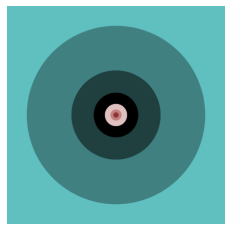

In [4]:
def f1(z):
    return z ** 2

display(f1)

- $(z-1)^2$

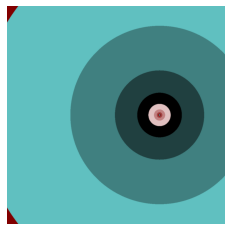

In [8]:
def f2(z):
    return (z-1)**2

display(f2)

- $z^2 – 1$

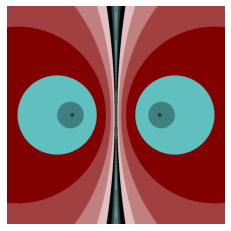

In [9]:
def f3(z):
    return z**2 - 1

display(f3)

- $z^2+ 1$

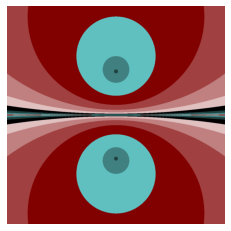

In [10]:
def f4(z):
    return z**2 + 1

display(f4)

## 4.

Plot the Newton iterations for points on the positive and negative axes for the complex quadratic polynomials in 3. Give an interpretation of the results.

In [44]:
#Iteration forms with respect to the axes
z1 = 10.0 + 0.0j
z2 = -10.0 + 0.0j
z3 = 0.0 + 10.0j
z4 = 0.0 - 10.0j

#Iteration forms with respect to the diagonals
z5 = 10.0 + 10.0j
z6 = -10.0 + 10.0j
z7 = -10.0 -10.0j
z8 = 10.0 -10.0j
z9 = 0.0 + 0.0j

def newton_iteration(f, df, z):
    string = str(z)
    r = []
    i = []
    for k in range(50):
        dz = df(z)
        z = z - f(z) / dz # Newton iteration
        r.append(np.real(z))
        i.append(np.imag(z))
    plt.title('Newton iteration form ' + string)
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imaginary part')
    plt.show()

- $z^2$

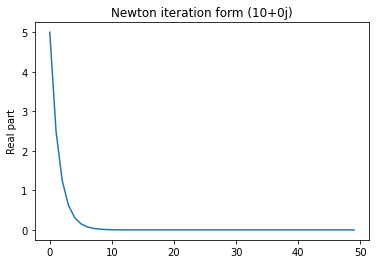

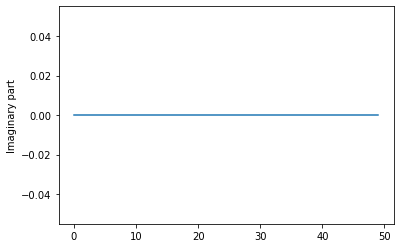

In [21]:
def df1(z):
    return 2*z

newton_iteration(f=f1, df=df1, z=z1)

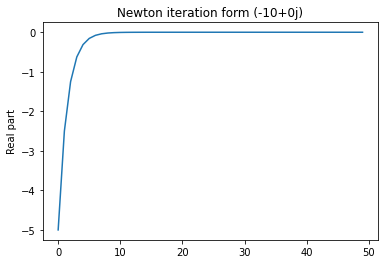

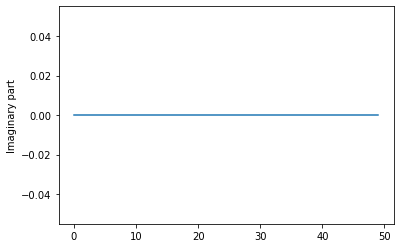

In [22]:
newton_iteration(f=f1, df=df1, z=z2)

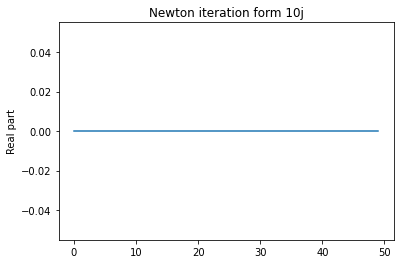

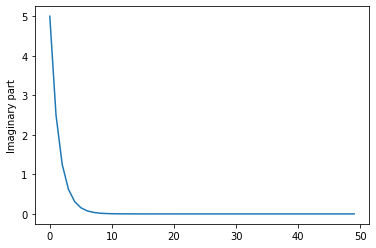

In [23]:
newton_iteration(f=f1, df=df1, z=z3)

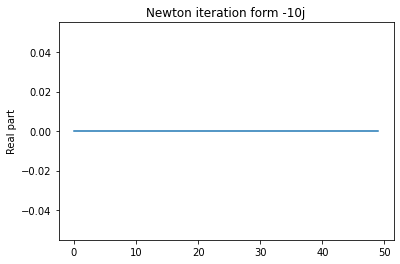

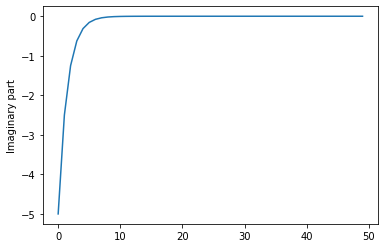

In [24]:
newton_iteration(f=f1, df=df1, z=z4)

In [25]:
newton_iteration(f=f1, df=df1, z=z5)

ZeroDivisionError: ignored

- $(z-1)^2$

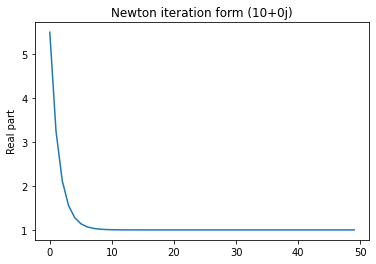

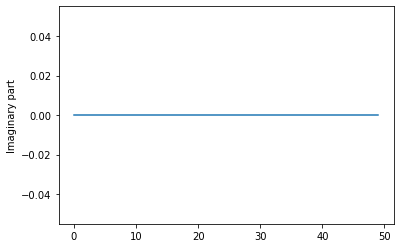

In [26]:
def df2(z):
    return 2*(z-1)

newton_iteration(f=f2, df=df2, z=z1)

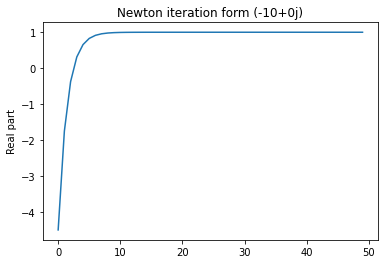

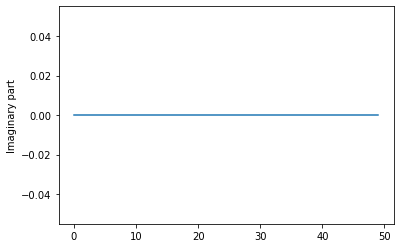

In [27]:
newton_iteration(f=f2, df=df2, z=z2)

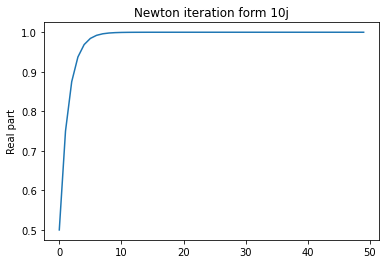

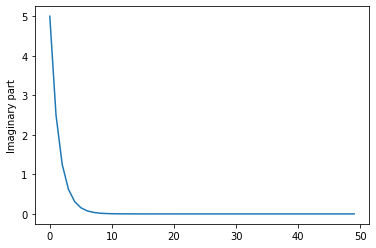

In [28]:
newton_iteration(f=f2, df=df2, z=z3)

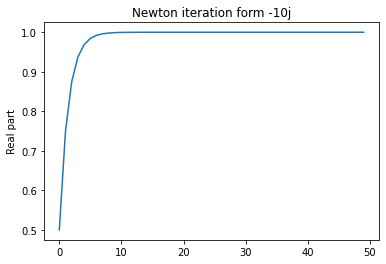

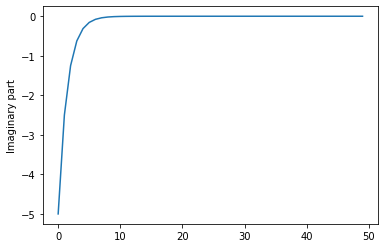

In [29]:
newton_iteration(f=f2, df=df2, z=z4)

- $z^2-1$

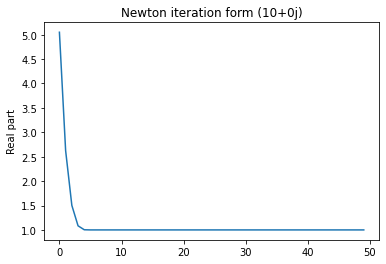

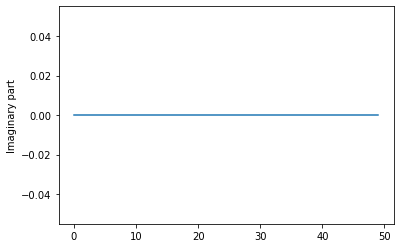

In [32]:
newton_iteration(f=f3, df=df1, z=z1)

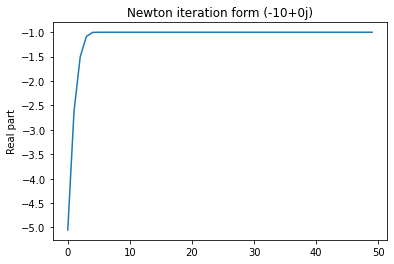

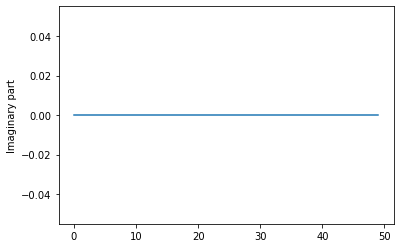

In [34]:
newton_iteration(f=f3, df=df1, z=z2)

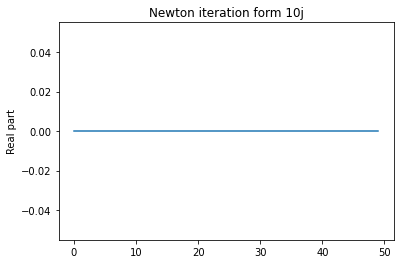

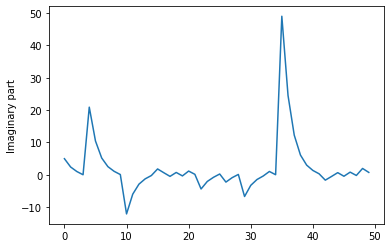

In [35]:
newton_iteration(f=f3, df=df1, z=z3)

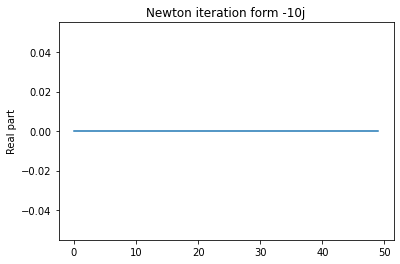

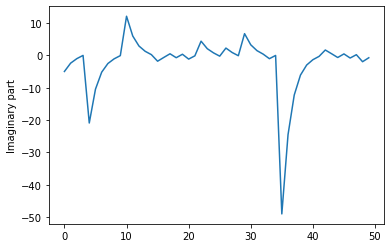

In [36]:
newton_iteration(f=f3, df=df1, z=z4)

- $z^2+1$

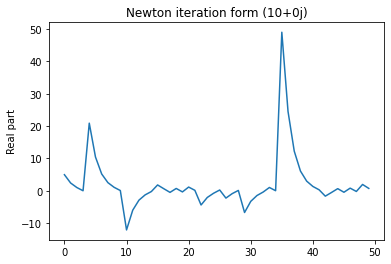

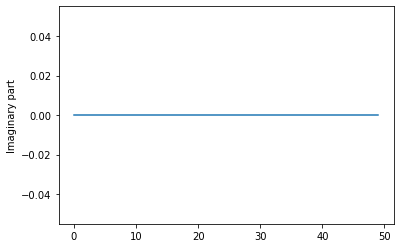

In [38]:
newton_iteration(f=f4, df=df1, z=z1)

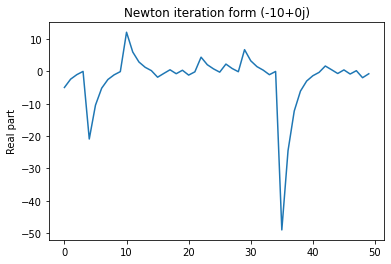

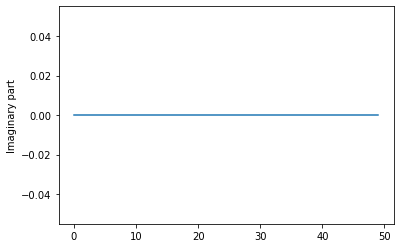

In [39]:
newton_iteration(f=f4, df=df1, z=z2)

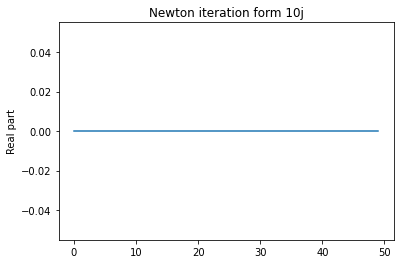

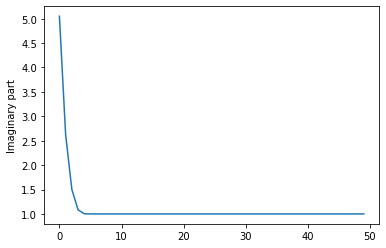

In [40]:
newton_iteration(f=f4, df=df1, z=z3)

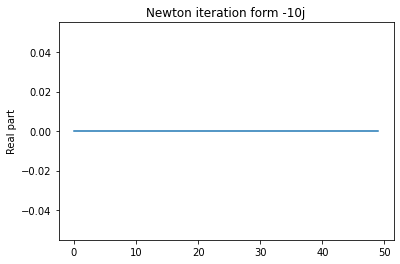

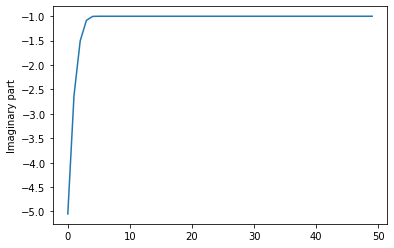

In [41]:
newton_iteration(f=f4, df=df1, z=z4)

### Interpretation of results:

It is clear that making the Newton Iterations with respect to each one of the positive and negative sections of the real and complex plane, and plotting the results for both the real and imaginary components, we can see how does the Newton-Raphson method behaves. For example, making iterations with the form $0+10j$ or  $0-10j$ will give us the behavior of the Newton Method for the 
positive and negative imaginary axes respectively, but it will keep constant in the real component as the plots show.

## 5.

Plot the Newton iterations for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomials in 3. Give an interpretation of the results.

- $z^2$

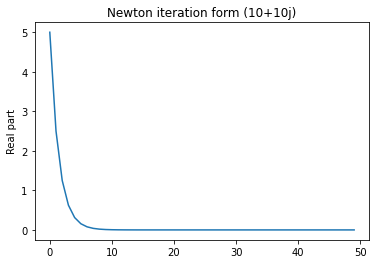

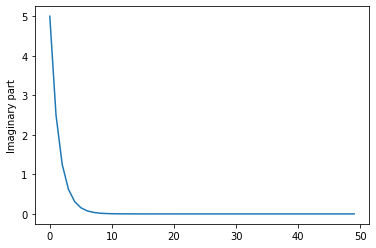

In [45]:
newton_iteration(f=f1, df=df1, z=z5)

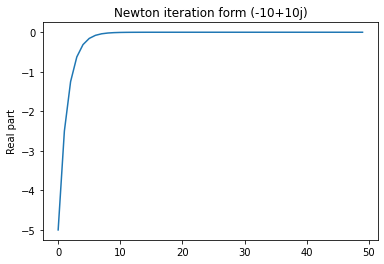

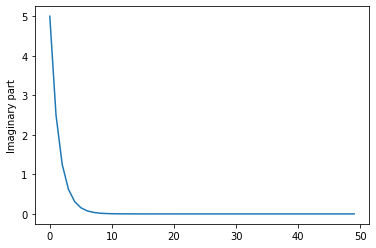

In [47]:
newton_iteration(f=f1, df=df1, z=z6)

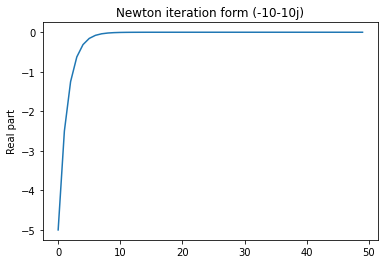

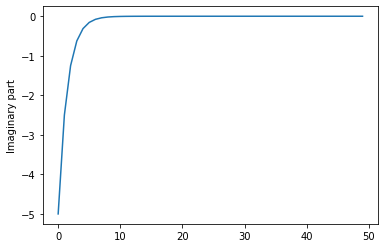

In [48]:
newton_iteration(f=f1, df=df1, z=z7)

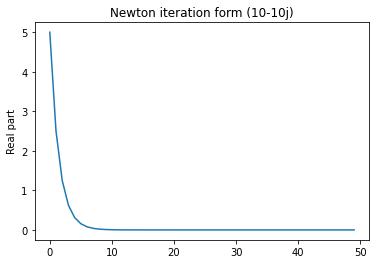

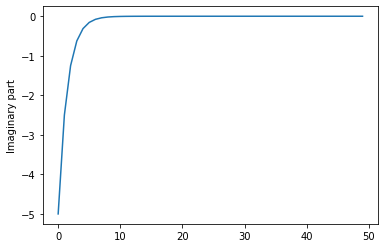

In [49]:
newton_iteration(f=f1, df=df1, z=z8)

In [50]:
newton_iteration(f=f1, df=df1, z=z9)

ZeroDivisionError: ignored

- $(z-1)^2$

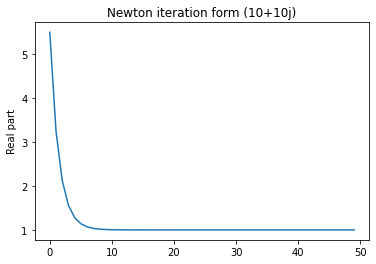

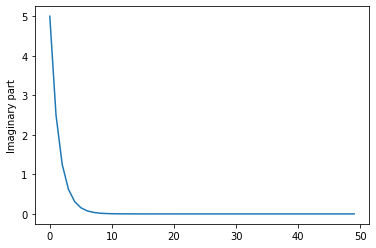

In [51]:
newton_iteration(f=f2, df=df2, z=z5)

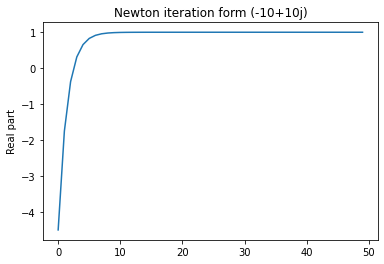

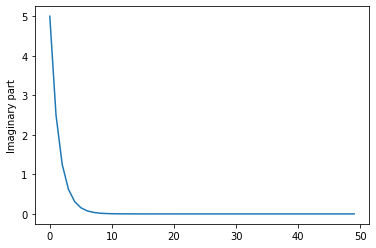

In [52]:
newton_iteration(f=f2, df=df2, z=z6)

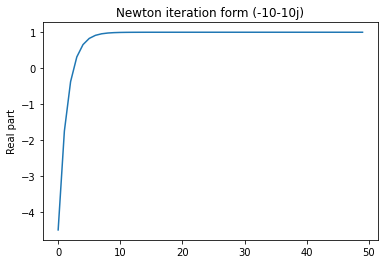

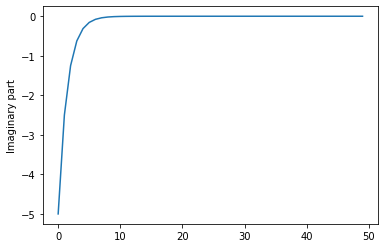

In [53]:
newton_iteration(f=f2, df=df2, z=z7)

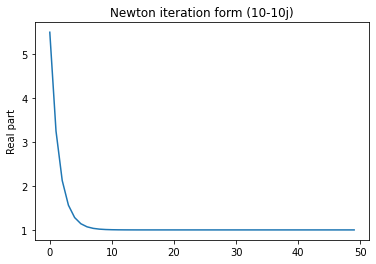

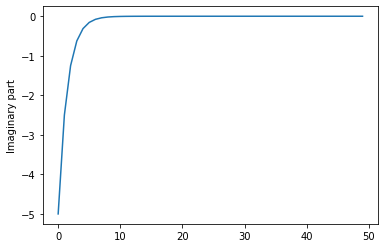

In [54]:
newton_iteration(f=f2, df=df2, z=z8)

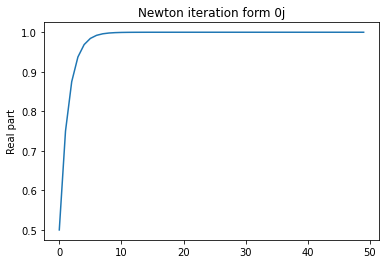

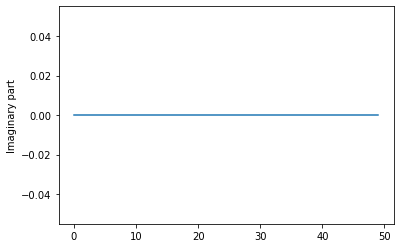

In [55]:
newton_iteration(f=f2, df=df2, z=z9)

- $z^2-1$

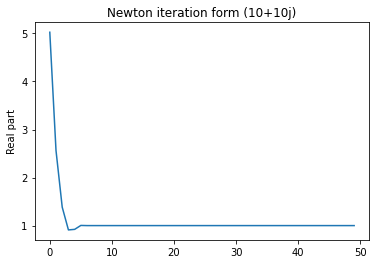

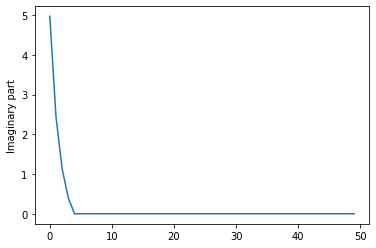

In [56]:
newton_iteration(f=f3, df=df1, z=z5)

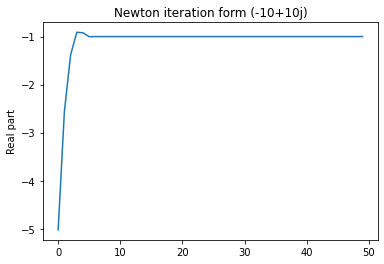

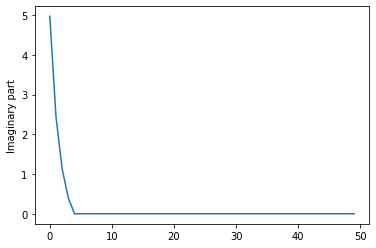

In [57]:
newton_iteration(f=f3, df=df1, z=z6)

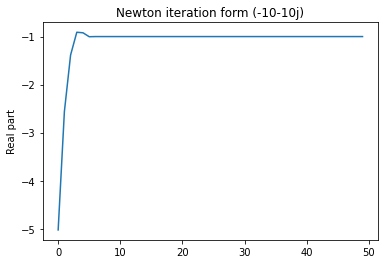

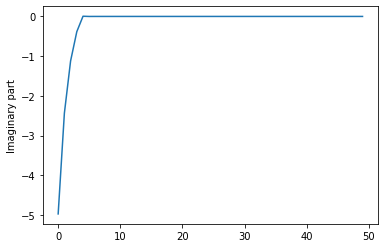

In [58]:
newton_iteration(f=f3, df=df1, z=z7)

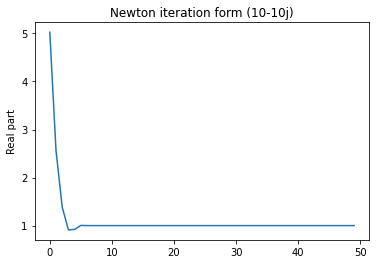

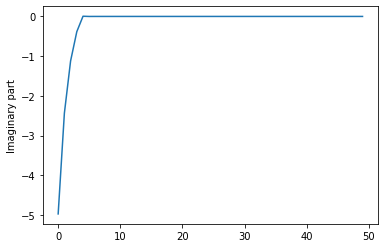

In [59]:
newton_iteration(f=f3, df=df1, z=z8)

In [60]:
newton_iteration(f=f3, df=df1, z=z9)

ZeroDivisionError: ignored

- $z^2+1$

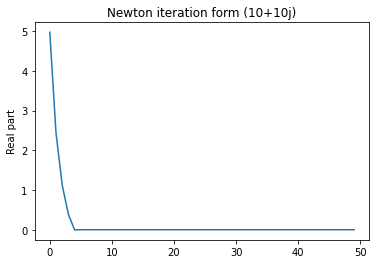

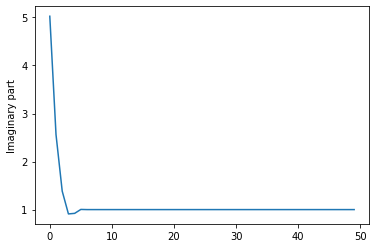

In [61]:
newton_iteration(f=f4, df=df1, z=z5)

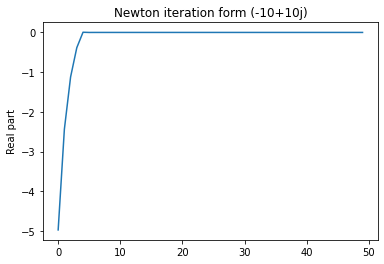

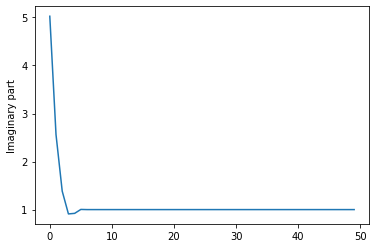

In [62]:
newton_iteration(f=f4, df=df1, z=z6)

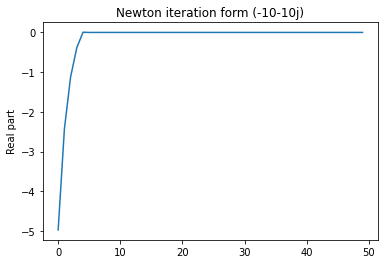

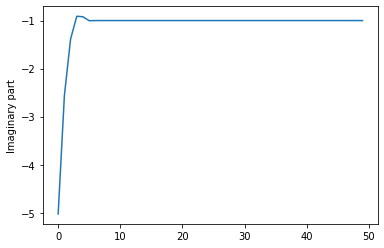

In [63]:
newton_iteration(f=f4, df=df1, z=z7)

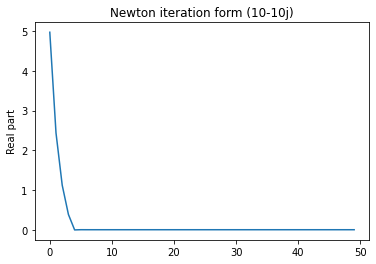

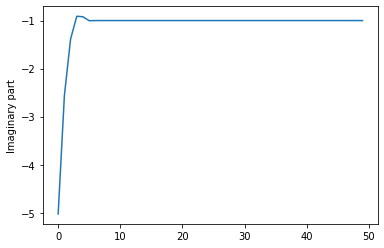

In [64]:
newton_iteration(f=f4, df=df1, z=z8)

In [65]:
newton_iteration(f=f4, df=df1, z=z9)

ZeroDivisionError: ignored

### Interpretation of results:

Making the Newton Iterations with respect to diagonals of the complex plane, and plotting the results for both the real and imaginary components, we can see how does the Newton-Raphson method behaves with respect of both the real and imaginary components. For example, making iterations with the form $10+10j$ or  $10-10j$ will give us the behavior of the Newton Method for the 
positive diagonal on the first quadrant and the diagonal on the second quadrant respectively. Also, note that diagonal $10-10j$ on the fourth quadrant is a reflection of the diagonal $-10+10j$ on the second quadrant with respect to the diagonal $x=z$, and similarly for the first and third quadrants. For that reason, the plots of the Newton iterations for those pairs of diagonals are also a reflection.